<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 70 kB 9.5 MB/s             


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [7]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [8]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [12]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1642079228777, 43816.41969175357],
 [1642082596289, 43991.10705362516],
 [1642086471956, 44046.08436602141],
 [1642089673636, 42979.593359374114],
 [1642093226543, 43324.93335811952]]

Finally lets turn this data into a Pandas DataFrame.


In [13]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1642079228777,43816.419692
1,1642082596289,43991.107054
2,1642086471956,44046.084366
3,1642089673636,42979.593359
4,1642093226543,43324.933358
...,...,...
712,1644656526435,42370.668863
713,1644660109068,42496.671408
714,1644663707557,42294.721937
715,1644667317051,42409.764544


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [17]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data['date']


0      2022-01-13
1      2022-01-13
2      2022-01-13
3      2022-01-13
4      2022-01-13
          ...    
712    2022-02-12
713    2022-02-12
714    2022-02-12
715    2022-02-12
716    2022-02-12
Name: date, Length: 717, dtype: object

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [19]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2022-01-13  42641.775744  44046.084366  43816.419692  42641.775744
1   2022-01-14  42024.696613  43494.768268  42608.410012  43433.833195
2   2022-01-15  42669.966529  43621.322967  43191.970778  43323.334689
3   2022-01-16  42819.455903  43445.732634  43173.141135  43225.925800
4   2022-01-17  41756.892084  43119.792143  43119.792143  42346.541012
5   2022-01-18  41356.611128  42498.478539  42311.130968  42498.478539
6   2022-01-19  41265.005495  42652.558156  42395.458792  42035.879540
7   2022-01-20  41244.725588  43308.039567  41749.551431  41244.725588
8   2022-01-21  35761.710944  41011.486226  40707.682414  35761.710944
9   2022-01-22  34527.652838  36639.176855  36385.341363  34935.310598
10  2022-01-23  34804.560653  36066.538675  35180.435463  35578.381137
11  2022-01-24  33505.713858  37475.908358  36306.409440  36313.848952
12  2022-01-25  35932.246801  37364.884607  36774.007142  36833.930796
13  2022-01-26  36480.078290  38566.225084  36988.928511  36776.532241
14  2022-01-27  35622.943567  37053.064536  37007.385906  36974.749750
15  2022-01-28  36301.514582  37907.740050  37276.839558  37742.296335
16  2022-01-29  37540.930536  38509.115336  37852.579028  38191.791040
17  2022-01-30  37575.728711  38333.500420  38232.178732  37874.997967
18  2022-01-31  36920.786339  38563.863262  37983.151499  38494.392527
19  2022-02-01  38277.927203  39048.306029  38555.534461  38728.890085
20  2022-02-02  36907.865554  38801.342545  38801.342545  37175.509611
21  2022-02-03  36438.718199  37179.775737  37000.982499  36928.709024
22  2022-02-04  37101.351594  40781.156174  37101.351594  40717.528284
23  2022-02-05  41315.191902  41837.961720  41673.839554  41663.433095
24  2022-02-06  41388.237025  41769.576120  41493.690051  41708.010101
25  2022-02-07  41887.515947  44425.793222  42475.543221  44183.676337
26  2022-02-08  43027.310945  44938.360267  43910.929986  44156.931122
27  2022-02-09  43383.780066  44758.036782  44184.447512  44637.240496
28  2022-02-10  43832.229497  45481.588945  44383.888055  43914.600338
29  2022-02-11  42175.813082  43876.154545  43628.139532  42175.813082
30  2022-02-12  42174.789870  42519.554617  42445.388768  42363.968590

Finally we are now ready to use plotly to create our Candlestick Chart.


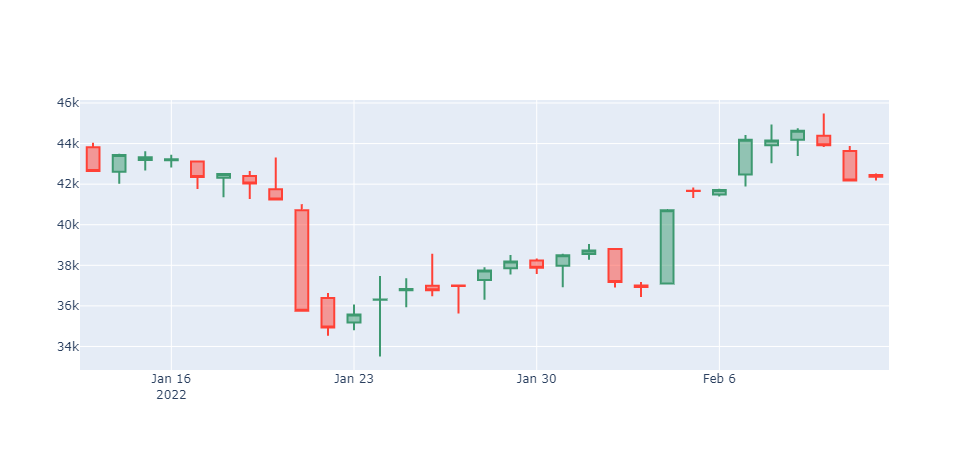

In [21]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
